In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('dummies_data.csv')

In [120]:
df.head(5)

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_periods_1-12,Tenure_periods_13-24,Tenure_periods_25-36,Tenure_periods_37-48,Tenure_periods_49-60,Tenure_periods_61-72
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [121]:
X = df.drop('Churn', axis = 1)
y = df['Churn'].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=132)

Models: <br>
1. Naive Bayes <br>

In [123]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [124]:
gnb.score(X_test,y_test)

0.6922530206112296

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1048
           1       0.44      0.83      0.58       359

    accuracy                           0.69      1407
   macro avg       0.68      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407



In [128]:
confusion_matrix(y_test,y_pred)

array([[676, 372],
       [ 61, 298]], dtype=int64)

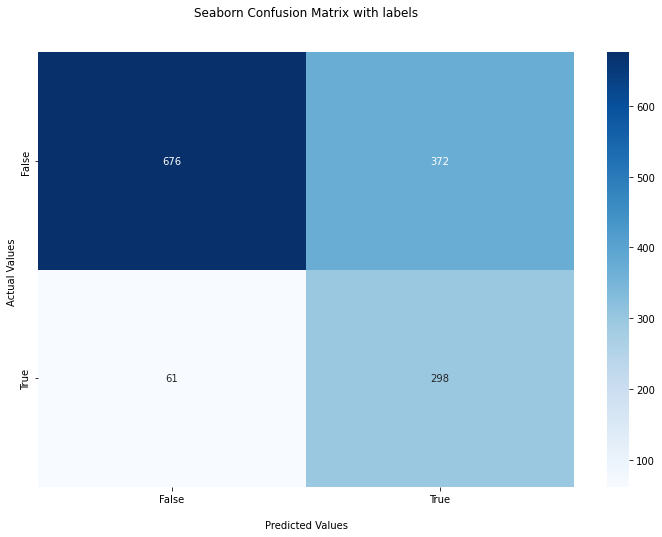

In [129]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm, annot=True,fmt="d", cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

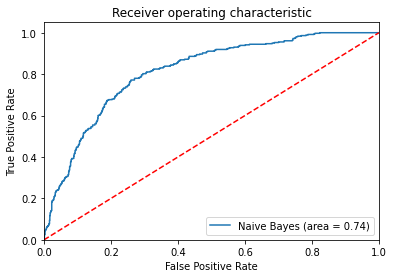

In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

2. Logistic regression <br>

In [55]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [131]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
model_lg = LogisticRegression()

In [133]:
model_lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [134]:
train_acc = model_lg.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 80.96


In [135]:
y_pred = model_lg.predict(X_test_scaled)

In [136]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 79.60199004975125


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1048
           1       0.63      0.49      0.55       359

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



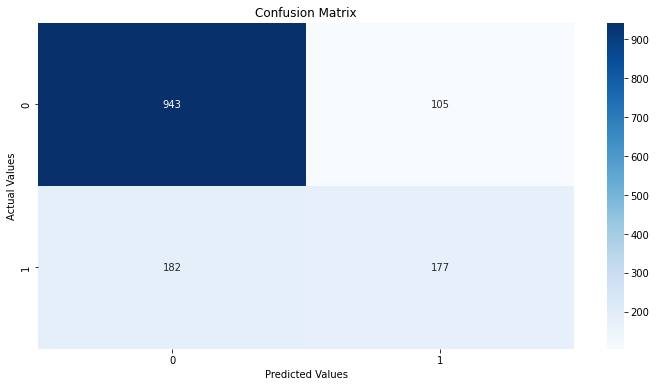

In [138]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

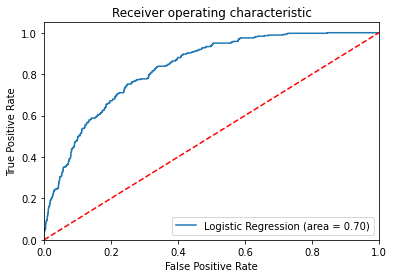

In [141]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model_lg.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

3. K-nearest neighbors <br>
4. Random forest <br>
5. Xgboost